<a href="https://colab.research.google.com/github/nupurrana451/Machine-Learning-Projects/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [3]:
cust_df=pd.read_csv("/content/Mall_Customers.csv")

In [4]:
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
cust_df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: xlabel='Spending Score (1-100)'>

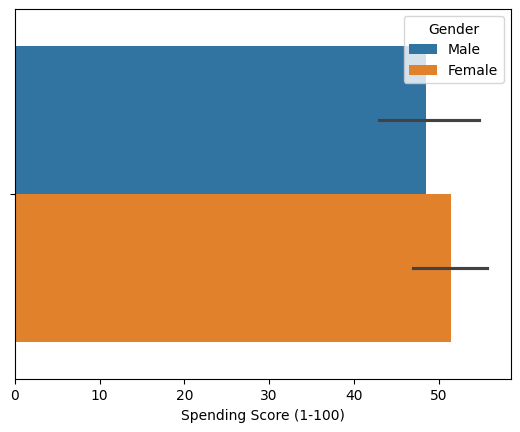

In [22]:
sns.barplot(data=cust_df, x='Spending Score (1-100)', hue='Gender')

<Axes: xlabel='Annual Income (k$)'>

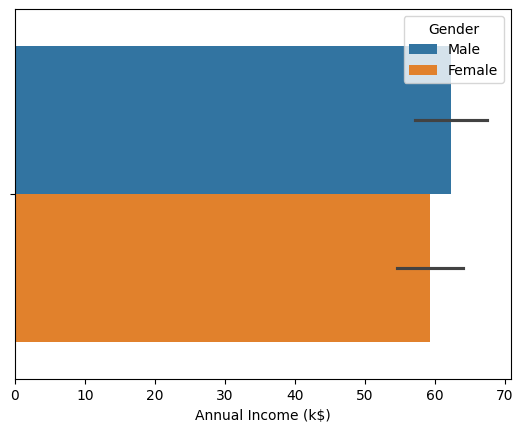

In [21]:
sns.barplot(data=cust_df,x=cust_df['Annual Income (k$)'],hue=cust_df['Gender'])

<Axes: xlabel='Gender', ylabel='count'>

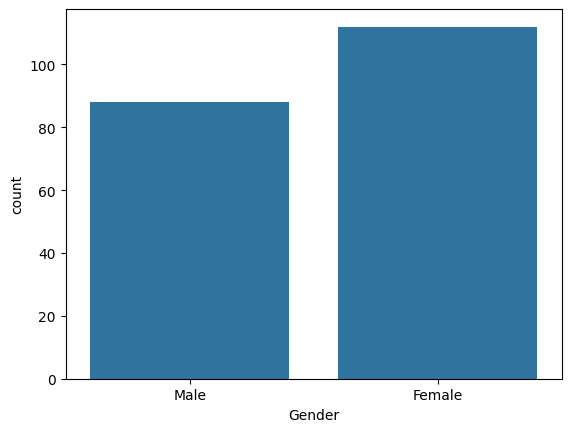

In [14]:
sns.countplot(data=cust_df,x='Gender')

In [16]:
def age_group(age):
    if age < 21:
        return '0-21'
    elif age >= 21 and age < 40:
        return '21-40'
    elif age >= 40 and age < 60:
        return '40-60'
    else:
        return '60+'
cust_df['Age_Group']=cust_df['Age'].apply(age_group)

In [17]:
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group
0,1,Male,19,15,39,0-21
1,2,Male,21,15,81,21-40
2,3,Female,20,16,6,0-21
3,4,Female,23,16,77,21-40
4,5,Female,31,17,40,21-40


<Axes: xlabel='Age_Group', ylabel='count'>

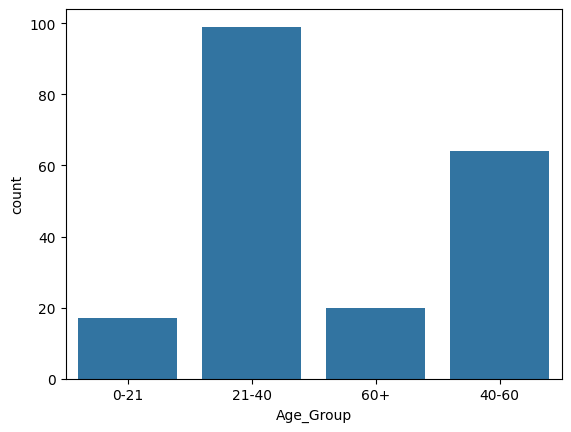

In [18]:
sns.countplot(data=cust_df,x='Age_Group')

<Axes: xlabel='Spending Score (1-100)'>

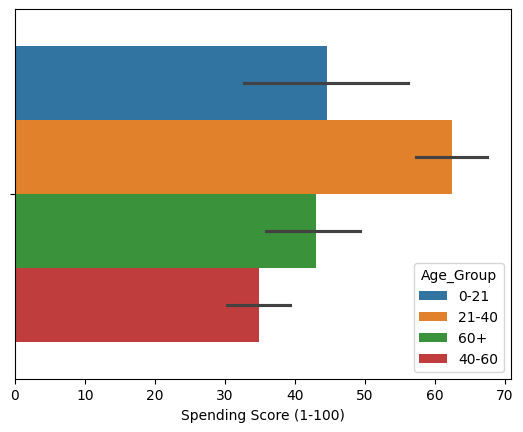

In [20]:
sns.barplot(data=cust_df,x=cust_df['Spending Score (1-100)'],hue=cust_df['Age_Group'])

<Axes: >

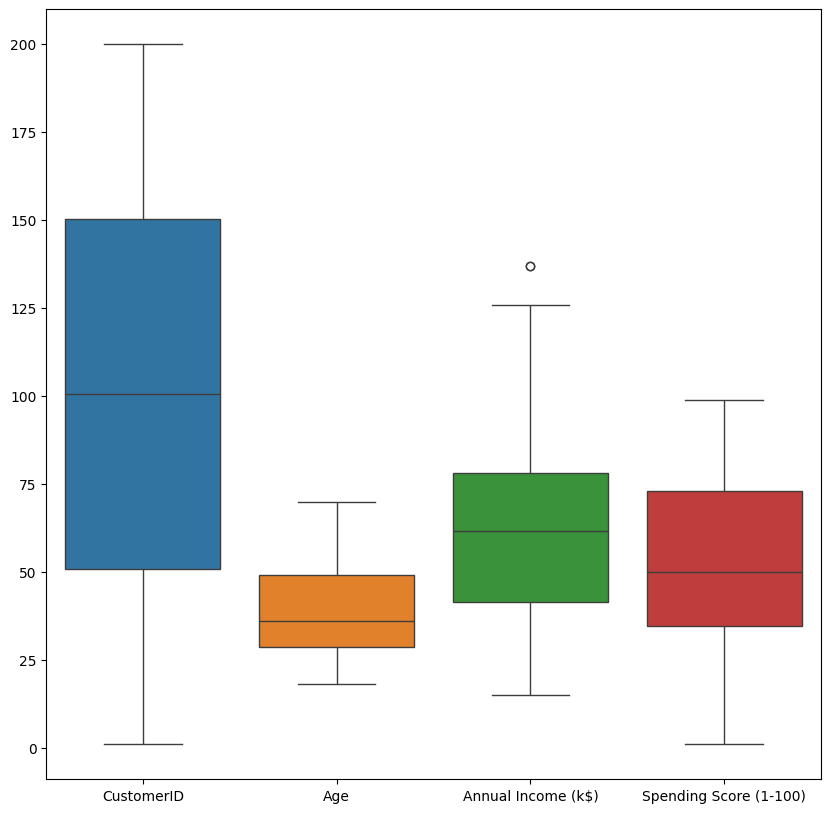

In [23]:
plt.figure(figsize=(10,10))

sns.boxplot(cust_df)

In [28]:
labels=LabelEncoder()
cust_df['Gender']=labels.fit_transform(cust_df['Gender'])
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group
0,1,1,19,15,39,0-21
1,2,1,21,15,81,21-40
2,3,0,20,16,6,0-21
3,4,0,23,16,77,21-40
4,5,0,31,17,40,21-40


In [37]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=45)
    kmeans.fit(cust_df.iloc[:,3:4])
    wcss.append(kmeans.inertia_)

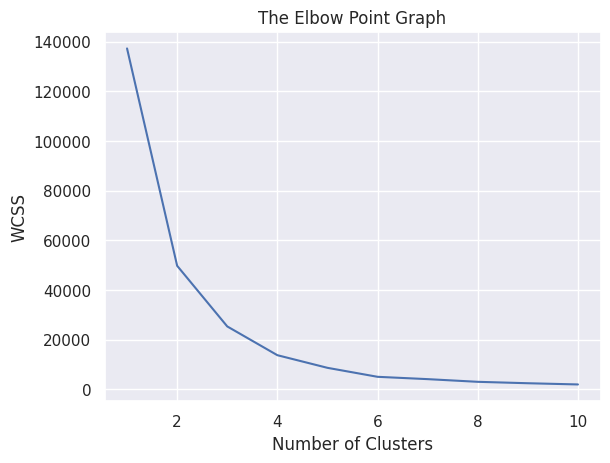

In [38]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=45)
Y=kmeans.fit_predict(cust_df.iloc[:,3:4])
print(Y)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0]


# Visualization

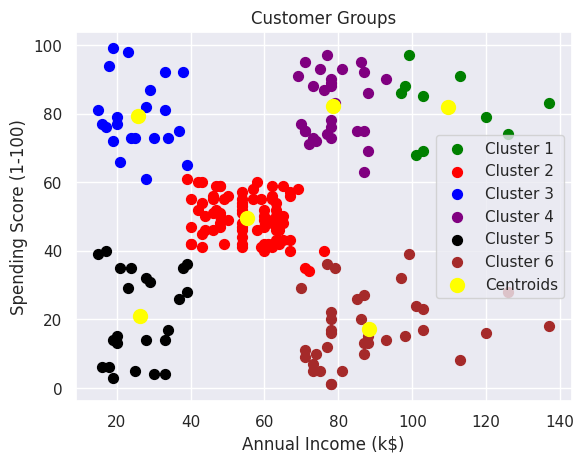

In [40]:
# Select both 'Annual Income (k$)' and 'Spending Score (1-100)'
X = cust_df.iloc[:, [3, 4]].values

# Re-run KMeans with 4 clusters using the corrected X
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=45, n_init=10) # Added n_init for clarity/best practice
Y = kmeans.fit_predict(X)

# Visualization
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2') # Changed color for better visibility
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='blue',label='Cluster 3') # Changed color for better visibility
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='purple',label='Cluster 4') # Changed color for better visibility
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='black',label='Cluster 5')
plt.scatter(X[Y==5,0],X[Y==5,1],s=50,c='brown',label='Cluster 6')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)') # Corrected xlabel
plt.ylabel('Spending Score (1-100)') # Corrected ylabel
plt.legend()
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

In [35]:
encoder=LabelEncoder()

In [38]:
sales_df['Item_Identifier'] = encoder.fit_transform(sales_df['Item_Identifier'])

sales_df['Item_Fat_Content'] = encoder.fit_transform(sales_df['Item_Fat_Content'])

sales_df['Item_Type'] = encoder.fit_transform(sales_df['Item_Type'])

sales_df['Outlet_Identifier'] = encoder.fit_transform(sales_df['Outlet_Identifier'])

sales_df['Outlet_Size'] = encoder.fit_transform(sales_df['Outlet_Size'])

sales_df['Outlet_Location_Type'] = encoder.fit_transform(sales_df['Outlet_Location_Type'])

sales_df['Outlet_Type'] = encoder.fit_transform(sales_df['Outlet_Type'])

In [39]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999.0,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009.0,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999.0,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998.0,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987.0,0,2,1,994.7052


In [40]:
X=sales_df.drop(columns='Item_Outlet_Sales',axis=1)
Y=sales_df['Item_Outlet_Sales']

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [44]:
from xgboost import XGBRegressor

In [45]:
regressor=XGBRegressor()
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_data_prediction=regressor.predict(X_train)